In [22]:
## Data Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time
from collections import Counter
from sklearn.cluster import DBSCAN

# Read data_train
train_set = np.genfromtxt('data_oct.csv', skip_header=1, delimiter=',')

# Get speed data (kph) for regular, AM peak, PM peak
speed_regular = train_set[:,0]
speed_AMpeak = train_set[:,3]
speed_PMpeak = train_set[:,5]

speed_regular = speed_regular[~np.isnan(speed_regular)]
speed_AMpeak = speed_AMpeak[~np.isnan(speed_AMpeak)]
speed_PMpeak = speed_PMpeak[~np.isnan(speed_PMpeak)]

# Get distance data (km) for regular, AM peak, PM peak
# x: input parameter
dist_regular = train_set[:,2]
dist_AMpeak = train_set[:,4]
dist_PMpeak = train_set[:,6]

dist_regular = dist_regular[~np.isnan(dist_regular)]
dist_AMpeak = dist_AMpeak[~np.isnan(dist_AMpeak)]
dist_PMpeak = dist_PMpeak[~np.isnan(dist_PMpeak)]

# Calculate travel time data (minutes) for regular, AM peak, PM peak
# y: ground truth
time_regular = dist_regular / speed_regular * 300
time_AMpeak = dist_AMpeak / speed_AMpeak * 300
time_PMpeak = dist_PMpeak / speed_PMpeak * 300

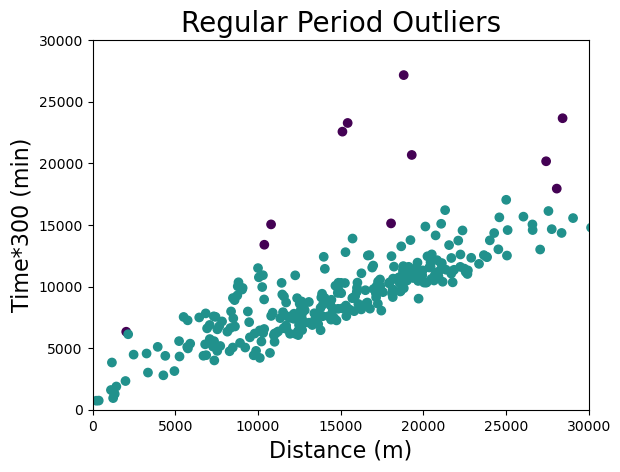

In [23]:
## Regular

data = np.column_stack((dist_regular, time_regular))

model = DBSCAN(eps=1700, min_samples=4).fit(data)

# PLOTTING

# Scatter plot function
colors = model.labels_

plt.scatter(data[:,0], data[:,1], c=colors, marker='o')
plt.title("Regular Period Outliers", fontsize=20)
plt.xlabel("Distance (m)", fontsize=16) # in meters
plt.ylabel("Time*300 (min)", fontsize=16) # in minutes

plt.xlim(0,30000)
plt.ylim(0,30000)

plt.show()

## Remove outliers

data = np.column_stack((speed_regular, dist_regular))

# Creating Panda DataFrame with Labels for Outlier Detection
outlier_df = pd.DataFrame(data)

# Exporting this DataFrame to CSV
outlier_df[model.labels_ == -1].to_csv("dbscan-regular-outliers.csv")
outlier_df[model.labels_ != -1].to_csv("regular-removed-outliers.csv")

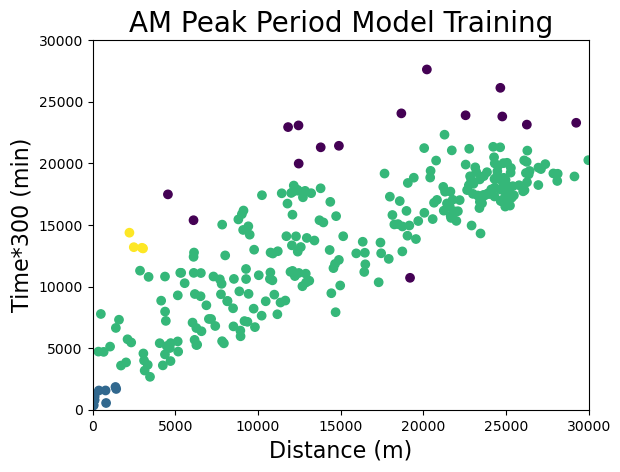

In [24]:
## AM Peak

data = np.column_stack((dist_AMpeak, time_AMpeak))

model = DBSCAN(eps=1700, min_samples=4).fit(data)

# PLOTTING

# Scatter plot function
colors = model.labels_

plt.scatter(data[:,0], data[:,1], c=colors, marker='o')
plt.title("AM Peak Period Model Training", fontsize=20)
plt.xlabel("Distance (m)", fontsize=16) # in meters
plt.ylabel("Time*300 (min)", fontsize=16) # in minutes

plt.xlim(0,30000)
plt.ylim(0,30000)

plt.show()

## Remove outliers

data = np.column_stack((speed_AMpeak, dist_AMpeak))

# Creating Panda DataFrame with Labels for Outlier Detection
outlier_df = pd.DataFrame(data)

# Exporting this DataFrame to CSV
outlier_df[model.labels_ == -1].to_csv("dbscan-AM-outliers.csv")
outlier_df[model.labels_ != -1].to_csv("removed-AM-outliers.csv")

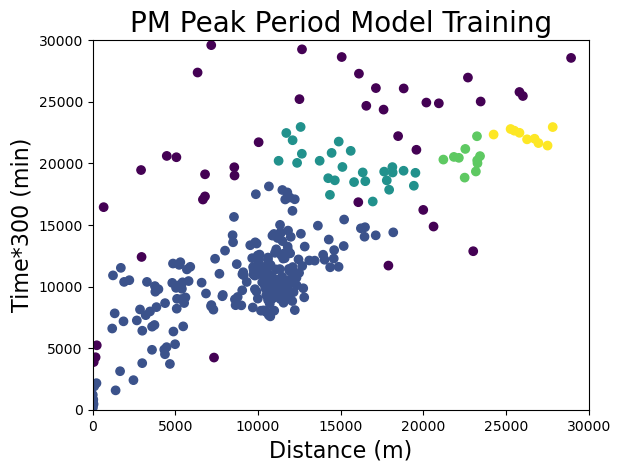

In [25]:
## PM Peak

data = np.column_stack((dist_PMpeak, time_PMpeak))

model = DBSCAN(eps=1500, min_samples=4).fit(data)

# PLOTTING

# Scatter plot function
colors = model.labels_

plt.scatter(data[:,0], data[:,1], c=colors, marker='o')
plt.title("PM Peak Period Model Training", fontsize=20)
plt.xlabel("Distance (m)", fontsize=16) # in meters
plt.ylabel("Time*300 (min)", fontsize=16) # in minutes

plt.xlim(0,30000)
plt.ylim(0,30000)

plt.show()

## Remove outliers

data = np.column_stack((speed_PMpeak, dist_PMpeak))

# Creating Panda DataFrame with Labels for Outlier Detection
outlier_df = pd.DataFrame(data)

# Exporting this DataFrame to CSV
outlier_df[model.labels_ == -1].to_csv("dbscan-PM-outliers.csv")
outlier_df[model.labels_ != -1].to_csv("removed-PM-outliers.csv")